# Praca domowa 6
#### Katarzyna Łabuś

In [2]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("Animation_Movies.csv/Animation_Movies.csv")

### 1. Opis zbioru danych  
a) Rozmiar ramki danych

In [16]:
df.shape

(51945, 23)

b) Liczba braków danych 

In [18]:
df.isnull().sum()[df.isnull().sum() > 0]

title                       1
release_date             2137
backdrop_path           36110
homepage                43692
imdb_id                 22393
original_title              1
overview                 6079
poster_path             14011
tagline                 47267
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64

c) Typ danych 

In [26]:
df.dtypes

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
dtype: object

### 2. Statystyki opisowe:

In [27]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,51945.0,6.188122e+05,3.479748e+05,12.0,330081.0,611915.0,915904.000,1.238314e+06
vote_average,51945.0,2.597083e+00,3.318748e+00,0.0,0.0,0.0,6.000,1.000000e+01
vote_count,51945.0,4.039538e+01,4.827059e+02,0.0,0.0,0.0,2.000,1.946300e+04
revenue,51945.0,1.863464e+06,3.049824e+07,0.0,0.0,0.0,0.000,1.450027e+09
runtime,51945.0,2.090141e+01,3.901600e+01,0.0,3.0,7.0,19.000,3.720000e+03
budget,51945.0,5.759513e+05,7.606628e+06,0.0,0.0,0.0,0.000,2.600000e+08
popularity,51945.0,1.886233e+00,9.700913e+00,0.0,0.6,0.6,0.882,1.008942e+03


#### Wnioski:
większość filmów ma brakujące lub zerowe wartości budżetu, przychodu, ocen i popularności. Tylko niewielka część filmów otrzymała znaczące oceny lub przychody, co sugeruje potrzebę oczyszczenia danych lub uwzględnienia jedynie filmów „Released” w dalszej analizie.

### 3. Analizę zmiennych numerycznych w zależności od przynależności do grupy. 
#### Wniosek dla status: 
Filmy o statusie Released mają średnio znacznie wyższe przychody i liczbę głosów niż filmy w produkcji lub planowane. Jest to spodziewane, ponieważ tylko wydane filmy mogą generować przychody i być oceniane przez widzów. 
#### Wniosek dla adult:
Filmy „dla dorosłych” mają niższą popularność i oceny niż pozostałe.

In [25]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object", "bool"]).columns

filtered_cat_cols = [col for col in cat_cols if df[col].nunique() <= 30 and df[col].nunique() > 1]

for cat in filtered_cat_cols:
    print(f"\n{'='*60}\nAnaliza względem zmiennej jakościowej: '{cat}'")
    try:
        grouped = df.groupby(cat)[num_cols].mean().round(2)
        display(grouped)
    except Exception as e:
        print(f"Nie można przetworzyć kolumny '{cat}': {e}")


Analiza względem zmiennej jakościowej: 'status'


,id,vote_average,vote_count,revenue,runtime,budget,popularity
status,,,,,,,
Canceled,768778.82,0.00,0.00,0.00,16.41,0.00,0.72
In Production,989513.40,0.08,0.01,0.01,25.96,533116.10,1.64
Planned,933673.60,0.00,0.00,0.00,39.58,315285.52,0.83
Post Production,1047680.29,0.00,0.00,0.00,23.58,2785776.77,3.43
Released,613276.35,2.64,41.04,1893019.19,20.75,573948.65,1.89
Rumored,768662.27,0.55,0.09,0.00,1.00,0.00,0.66



Analiza względem zmiennej jakościowej: 'adult'


,id,vote_average,vote_count,revenue,runtime,budget,popularity
adult,,,,,,,
False,618066.22,2.60,40.57,1871606.99,20.88,578465.45,1.89
True,789517.13,1.87,0.76,5.83,26.75,597.76,1.43


### 4. Wykres względem zmiennej genres. 
Wniosek: dominują gatunki Animation, Family i Adventure. Animation jest zdecydowanym liderem. 

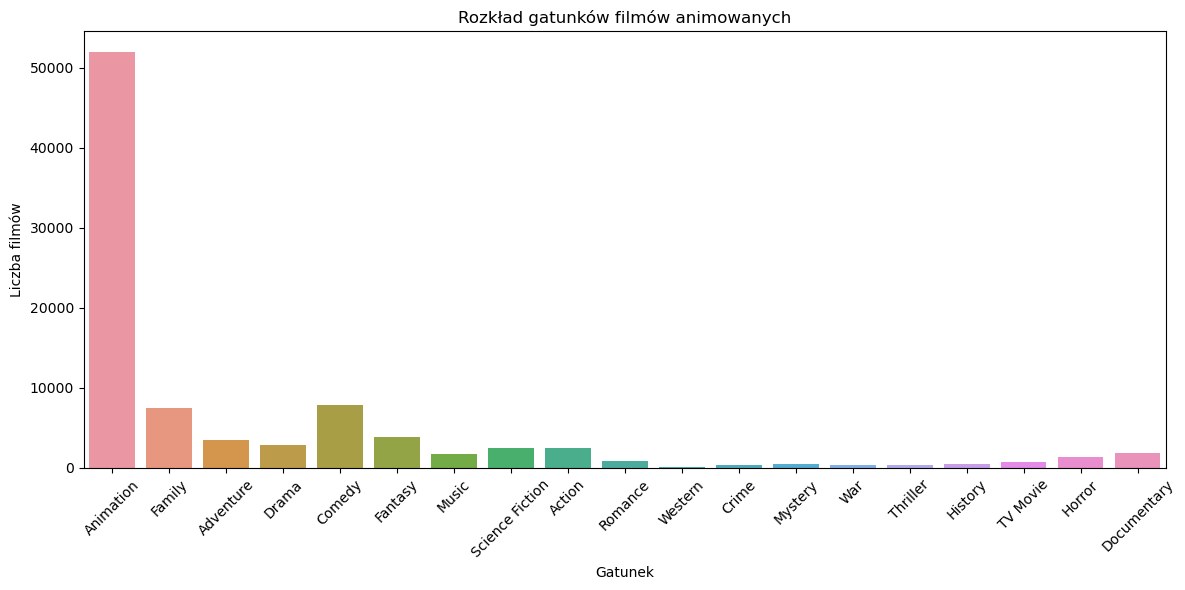

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

genre_split = df["genres"].dropna().apply(lambda x: [g.strip() for g in x.split(",")])
flat_genres = [g for sublist in genre_split for g in sublist]
genre_counts = Counter(flat_genres)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=45)
plt.title("Rozkład gatunków filmów animowanych")
plt.xlabel("Gatunek")
plt.ylabel("Liczba filmów")
plt.tight_layout()
plt.show()

### 5. Wykresy
#### a) zależność między czasem trwania filmu a liczbą głowów. 
Wniosek: Czas trwania nie ma silnej korelacji z liczbą głosów, ale pojawiają się ogólne trendy.
#### b) zależności między popularnością a przychodem filmu. 
Wniosek: Filmy z większą popularnością mają wyższe przychody.

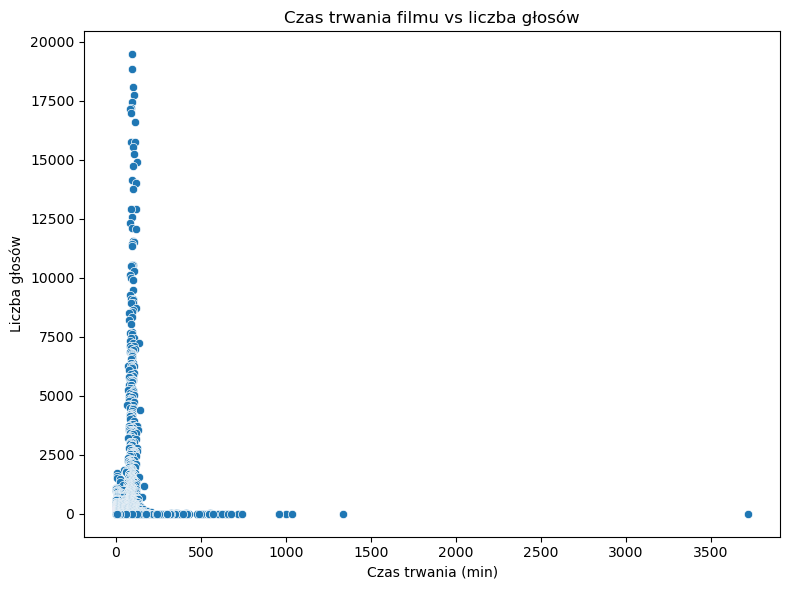

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="runtime", y="vote_count")
plt.title("Czas trwania filmu vs liczba głosów")
plt.xlabel("Czas trwania (min)")
plt.ylabel("Liczba głosów")
plt.tight_layout()
plt.show()

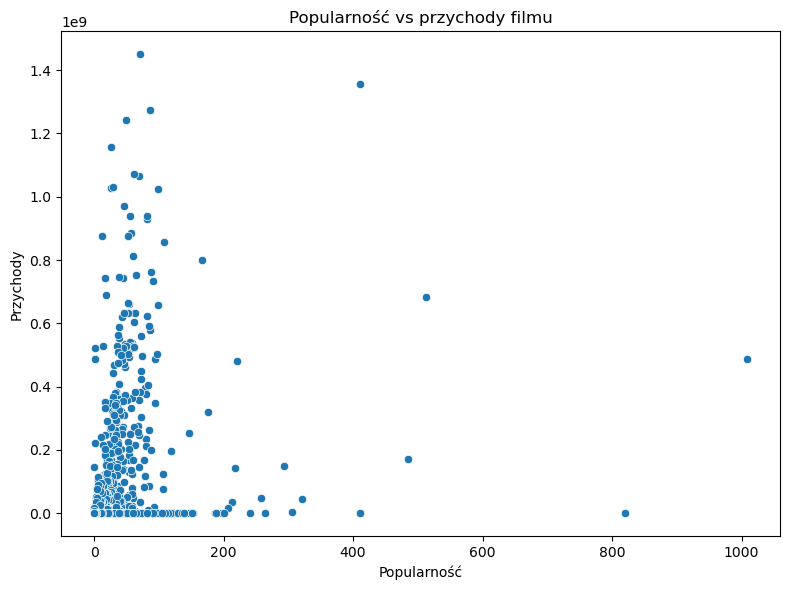

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="popularity", y="revenue")
plt.title("Popularność vs przychody filmu")
plt.xlabel("Popularność")
plt.ylabel("Przychody")
plt.tight_layout()
plt.show()